In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import lines
import copy
import time
import sys
import math
from IPython.display import clear_output
np.set_printoptions(threshold=sys.maxsize)
rng = np.random.default_rng()

In [11]:
def simulate_weights_sometimes_mono(p=0.5, q=0.1, N=1000, n=1000000):
    """
    Simulates weights for a Moran model where each timestep the probability for the biparental case is q. 
    Otherwise monoparental. This is a Model where a monoparental sexual reproduction is followed by 
    a horizontal gene transfer event with probability q. Each gene is then transfered with probability p.
    """
    Weights = np.ones(N)
    indices = np.arange(0, N, 1, dtype=int)
    print("Simulating weights:")
    clear_output(wait=True)
    for i in range(n):
        kappa, pi, mu = rng.choice(indices, size=3, replace=False)
        mono = rng.random() < 1-q
        if mono:
            Weights[pi] = Weights[pi] + Weights[kappa]
        if not mono:
            Weights[pi] = Weights[pi] + (p)*Weights[kappa]
            Weights[mu] = Weights[mu] + (1-p)*Weights[kappa]
        Weights[kappa] = 0
        if (i % 100000) == 0:
            print("\rSimulating weights: " + str(round((100*i)/n)) + "%")
            clear_output(wait=True)
    print("Simulating weights: 100%")
    clear_output(wait=True)
    return Weights

## Examples

### q=0.5, p=0.5

In [8]:
start = time.time()

N = 1000
n = 100000

indices = np.arange(0, N, 1, dtype=int)
weights_mixed = simulate_weights_sometimes_mono(q=0.5, N=N, n=n)
weights_mixed.sort()

end = time.time()
print(str(round((end-start)/60)) + " seconds")
print("Maximum weight: " + str(np.max(weights_mixed)))
print("Number of zero-weights: " + str(np.where(weights_mixed != 0)[0][0]))

0 seconds
Maximum weight: 44.224375207317195
Number of zero-weights: 642


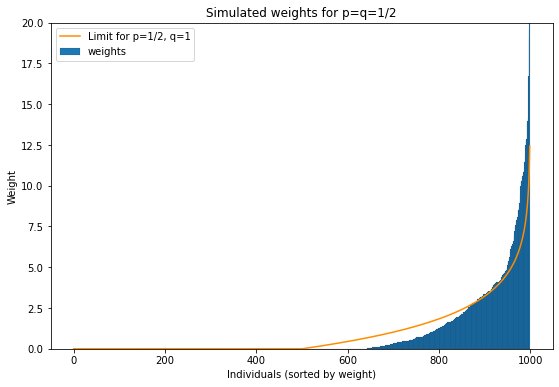

In [9]:
plt.bar(indices, weights_mixed, width=1, linewidth=0.08, edgecolor="black", label="weights")
plt.xlabel("Individuals (sorted by weight)")
plt.ylabel("Weight")
plt.title("Simulated weights for p=q=1/2")

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(9, 6)
ax.set_ylim([0, 20])

#This part plots the Quantile function corresponding to the Limit (n,N -> inf) for q=1, p=0.5 
#found by Camille Coron & Yves Le Jan.
Quantiles = -(2)*np.log(2*(1-indices[int((N*0.5)):]/N))
y = list(np.zeros(int((N*0.5))))
y.extend(Quantiles)
plt.plot(indices, y, color="darkorange", label="Limit for p=1/2, q=1")
plt.legend()

### q=0.1, p=0.01

In [12]:
start = time.time()

N = 1000
n = 10000000

indices = np.arange(0, N, 1, dtype=int)
weights_mixed = simulate_weights_sometimes_mono(q=0.1, p=0.01, N=N, n=n)
weights_mixed.sort()

end = time.time()
print(str(round((end-start)/60, 1)) + " minutes")
print("Maximum weight: " + str(np.max(weights_mixed)))
print("Number of zero-weights: " + str(np.where(weights_mixed != 0)[0][0]))

2.7 minutes
Maximum weight: 531.4899116622747
Number of zero-weights: 912


C:\Users\konst\AppData\Local\Temp/ipykernel_15272/2081774827.py:15: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(indices, np.log10(weights_mixed), s=100, edgecolors = "tab:blue", facecolors='none', linewidths = 2)
C:\Users\konst\AppData\Local\Temp/ipykernel_15272/2081774827.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(my_yticks) # Labeling of the y-axis


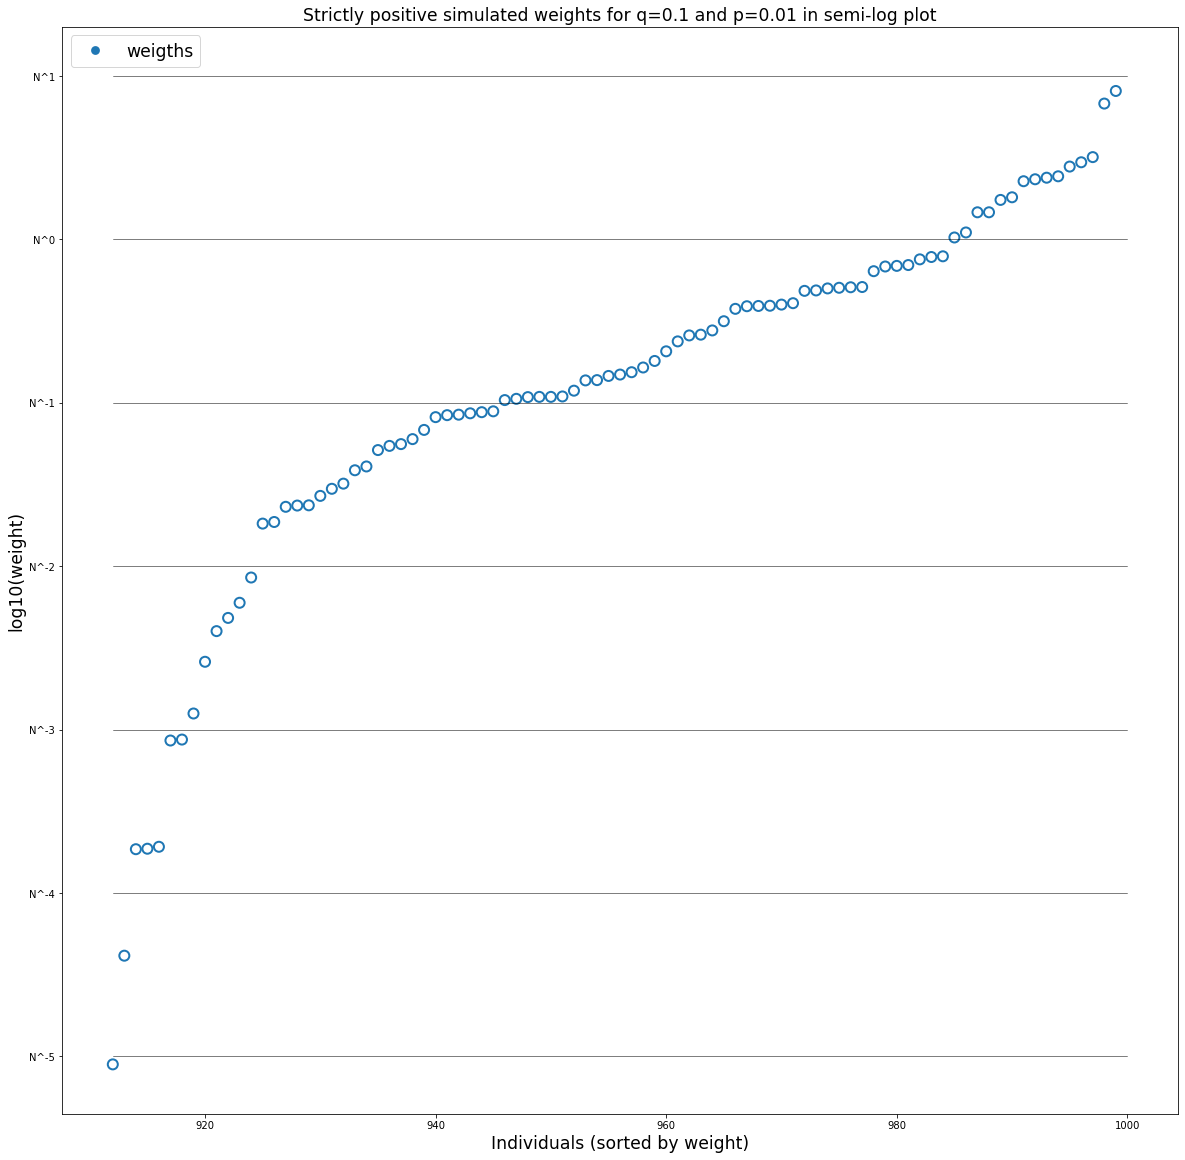

In [20]:
# RuntimeWarning due to approx. 1/(q+1) of the weights beeing 0 and log taken, not important.

factor = np.log10(N) # Semi-log plot is done with base 10
first_non_zero = np.where(weights_mixed != 0)[0][0] # First strictly positive weight. Independent of p but dependent of q
low = round(np.log10(weights_mixed[first_non_zero])) # Lowest strictly positive weight
my_yticks = [] # For labeling of y-axis
tick_positions = [] # For labeling of y-axis

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(20, 20) # Determines size of plot
#ax.set_xlim([first_non_zero-15, N+15]) # Can be used to only show strictly positive weights


ax.scatter(indices, np.log10(weights_mixed), s=100, edgecolors = "tab:blue", facecolors='none', linewidths = 2)


for i in range(abs(math.floor(low/factor))+2): # Plots the necessary horizontal lines at potencies of N
    power_of_N = int(-factor*i+factor)
    ax.plot([first_non_zero,N], [power_of_N, power_of_N], color="black", linewidth=0.5)
    my_yticks.append("N^"+str(-i+1))
    tick_positions.append(power_of_N)

    
blue_circle = lines.Line2D([], [], color="tab:blue", marker='o', linestyle='None', markersize=7, # Just for legend
                          markeredgewidth=1.8, label='weigths') 
   

ax.set_yticklabels(my_yticks) # Labeling of the y-axis      
ax.set_yticks(tick_positions) # Labeling of the y-axis      
plt.xlabel("Individuals (sorted by weight)", fontsize="xx-large")
plt.ylabel("log10(weight)", fontsize="xx-large")
plt.title("Strictly positive simulated weights for q=0.1 and p=0.01 in semi-log plot", fontsize="xx-large")
plt.legend(handles = [blue_circle], fontsize="xx-large", loc="upper left")